In [2]:
import torch
import os
from collections import defaultdict
from scipy.spatial import distance
from scipy.stats import spearmanr
import numpy as np
import json
from collections import defaultdict
import pandas as pd

with open('data/didec/didec_image_specificity_selfbleu.json', 'r') as f:
    selfbleu = json.load(f)

with open('startingpoint_var.json', 'r') as f:
    spvar = json.load(f)

with open('gaze_variation_SSD.json', 'r') as f:
    gazeSSD = json.load(f)

with open('onset_means.json', 'r') as f:
    onsets = json.load(f)

specs = []
specs_revbleu = []
spvars = []
gazevars = []
means = []

for im in selfbleu:
    specs.append(selfbleu[im])
    specs_revbleu.append(1 - selfbleu[im])
    spvars.append(spvar[im])
    gazevars.append(gazeSSD[im])
    means.append(onsets[im])

print(np.mean(spvars), np.min(spvars), np.max(spvars))

corr, pvalue = spearmanr(spvars, specs)
print('correlation sp var vs. img spec')
print(round(corr, 3), round(pvalue, 3))

corr, pvalue = spearmanr(spvars, gazevars)
print('correlation sp var vs. gaze var')
print(round(corr, 3), round(pvalue, 3))

corr, pvalue = spearmanr(gazevars, specs)
print('correlation gaze var vs. img spec')
print(round(corr, 3), round(pvalue, 3))

# onset
corr, pvalue = spearmanr(spvars, means)
print('correlation sp var vs. mean onset')
print(round(corr, 3), round(pvalue, 3))

corr, pvalue = spearmanr(means, specs)
print('correlation mean onset vs. img spec')
print(round(corr, 3), round(pvalue, 3))

corr, pvalue = spearmanr(gazevars, means)
print('correlation gaze var vs. mean onset')
print(round(corr, 3), round(pvalue, 3))


# reverse bleu
print('\nREVBLEU')
corr, pvalue = spearmanr(specs_revbleu, spvars)
print('correlation reversebleu vs. sp var')
print(round(corr, 3), round(pvalue, 3))

corr, pvalue = spearmanr(specs_revbleu, gazevars)
print('correlation reversebleu vs. gaze var')
print(round(corr, 3), round(pvalue, 3))

corr, pvalue = spearmanr(specs_revbleu, means)
print('correlation reversebleu vs. mean onset')
print(round(corr, 3), round(pvalue, 3))


6.449511400651466 1 13
correlation sp var vs. img spec
-0.516 0.0
correlation sp var vs. gaze var
0.336 0.0
correlation gaze var vs. img spec
-0.492 0.0
correlation sp var vs. mean onset
0.275 0.0
correlation mean onset vs. img spec
-0.391 0.0
correlation gaze var vs. mean onset
0.498 0.0

REVBLEU
correlation reversebleu vs. sp var
0.516 0.0
correlation reversebleu vs. gaze var
0.492 0.0
correlation reversebleu vs. mean onset
0.391 0.0


In [3]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 4))
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(3)


/tmp/ipykernel_34713/833975462.py:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(3)


,0,1,2,3
0,1.000,-0.251,0.197,-0.392
1,-0.251,1.000,-0.115,-0.262
2,0.197,-0.115,1.000,0.194
3,-0.392,-0.262,0.194,1.000


In [4]:
didec = pd.DataFrame([means, spvars, specs_revbleu, gazevars]).T

In [5]:
didec

,0,1,2,3
0,2.485543,6.0,0.512203,9.528535
1,3.620091,4.0,0.382698,14.323865
2,2.770923,7.0,0.561931,13.766598
3,4.384597,4.0,0.505561,14.016649
4,3.956366,4.0,0.327507,13.310679
...,...,...,...,...
302,4.207784,7.0,0.511987,13.643861
303,3.168497,6.0,0.580847,12.930787
304,2.133036,6.0,0.435684,11.567027
305,3.735631,7.0,0.606961,11.038588


In [6]:
corr = didec.corr(method='spearman')
corr

,0,1,2,3
0,1.000000,0.275302,0.391332,0.497753
1,0.275302,1.000000,0.515977,0.335816
2,0.391332,0.515977,1.000000,0.492433
3,0.497753,0.335816,0.492433,1.000000


In [7]:
corr.columns = ['Onset', 'SPvar', 'ImSpec', 'GazeVar']
corr.index = ['Onset', 'SPvar', 'ImSpec', 'GazeVar']
corr

,Onset,SPvar,ImSpec,GazeVar
Onset,1.000000,0.275302,0.391332,0.497753
SPvar,0.275302,1.000000,0.515977,0.335816
ImSpec,0.391332,0.515977,1.000000,0.492433
GazeVar,0.497753,0.335816,0.492433,1.000000


In [18]:
didec.columns = ['Onset', 'Starting', 'Description', 'Gaze']
didec

,Onset,Starting,Description,Gaze
0,2.485543,6.0,0.512203,9.528535
1,3.620091,4.0,0.382698,14.323865
2,2.770923,7.0,0.561931,13.766598
3,4.384597,4.0,0.505561,14.016649
4,3.956366,4.0,0.327507,13.310679
...,...,...,...,...
302,4.207784,7.0,0.511987,13.643861
303,3.168497,6.0,0.580847,12.930787
304,2.133036,6.0,0.435684,11.567027
305,3.735631,7.0,0.606961,11.038588


In [19]:
corr.style.background_gradient(cmap='coolwarm', axis=None).format(precision=3)

,Onset,SPvar,ImSpec,GazeVar
Onset,1.000,0.275,0.391,0.498
SPvar,0.275,1.000,0.516,0.336
ImSpec,0.391,0.516,1.000,0.492
GazeVar,0.498,0.336,0.492,1.000


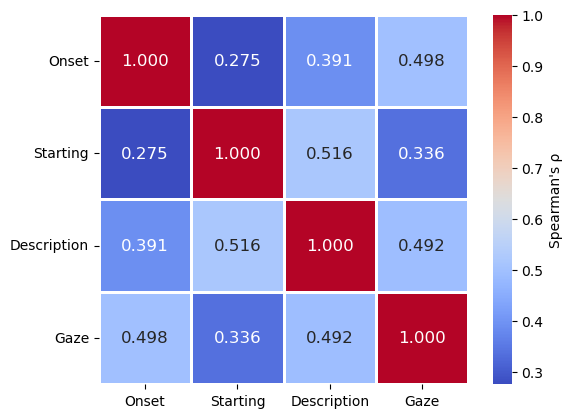

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
sns.heatmap(didec.corr(method='spearman'), annot=True, fmt='.3f', 
            cmap=plt.get_cmap('coolwarm'), cbar=True, ax=ax, 
            annot_kws={"fontsize":12}, square=True, linewidths=1, cbar_kws={'label': 'Spearman\'s ρ'})
ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal")
plt.savefig('correlations.png', dpi=300, bbox_inches='tight', pad_inches=0.0)

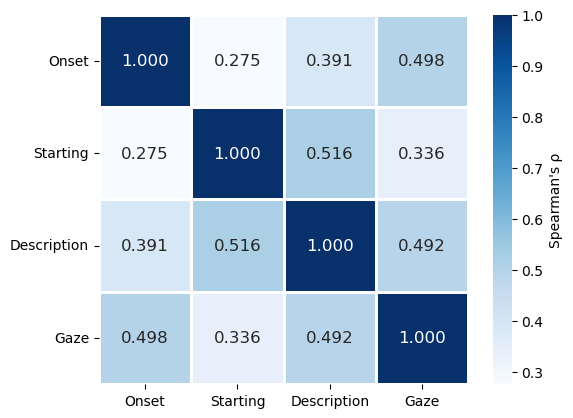

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
sns.heatmap(didec.corr(method='spearman'), annot=True, fmt='.3f', 
            cmap=plt.get_cmap('Blues'), cbar=True, ax=ax, 
            annot_kws={"fontsize":12}, square=True, linewidths=1, cbar_kws={'label': 'Spearman\'s ρ'})
ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal")
plt.savefig('correlations.png', dpi=300, bbox_inches='tight', pad_inches=0.0)

In [22]:
didec.corr(method='spearman')

,Onset,Starting,Description,Gaze
Onset,1.000000,0.275302,0.391332,0.497753
Starting,0.275302,1.000000,0.515977,0.335816
Description,0.391332,0.515977,1.000000,0.492433
Gaze,0.497753,0.335816,0.492433,1.000000


In [23]:
dc = didec.corr(method='spearman')

In [24]:
trimask = np.triu(np.ones_like(dc, dtype=bool))
trimask

array([[ True,  True,  True,  True],
       [False,  True,  True,  True],
       [False, False,  True,  True],
       [False, False, False,  True]])

In [25]:
trimask[np.diag_indices_from(trimask)] = False

In [26]:
trimask

array([[False,  True,  True,  True],
       [False, False,  True,  True],
       [False, False, False,  True],
       [False, False, False, False]])

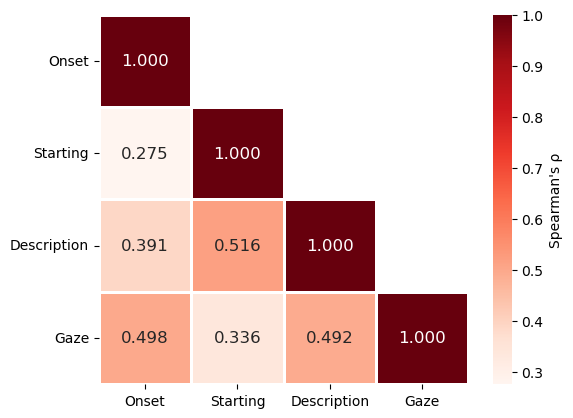

In [33]:
fig, ax = plt.subplots()
sns.heatmap(didec.corr(method='spearman'), annot=True, fmt='.3f', 
            cmap=plt.get_cmap('Reds'), cbar=True, ax=ax, 
            annot_kws={"fontsize":12}, square=True, linewidths=1, cbar_kws={'label': 'Spearman\'s ρ'},
           mask = trimask)
ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal")
plt.savefig('correlations_red.png', dpi=300, bbox_inches='tight', pad_inches=0.0)